In [2]:
import os
import numpy as np
import shutil

In [ ]:
#因為web datasets採用dlib的標點順序並不符合我們以及openface的順序，所以需要先做資料的預處理，將左眼的標點順序改正。

# Fix HELEN

In [2]:
root = 'D:/share/new_dataset/gaze_dataset_on_web/HELEN'
save_root = 'D:/share/new_dataset/gaze_dataset_on_web/HELEN_FIX'
if not os.path.exists(save_root):
    os.makedirs(save_root)

In [28]:
for fn_list in os.walk(root):
    for fn in fn_list[2]:
        if fn.endswith('.txt') and not fn.endswith('face.txt'):
            txt = os.path.join(fn_list[0],fn)
            path = txt[len(root)+1:]
            save_path = os.path.join(save_root,path)
            if not os.path.exists(os.path.dirname(save_path)):
                os.makedirs(os.path.dirname(save_path))
            label = np.genfromtxt(txt,delimiter=',')
            label = label.astype('int')
            anc = label.copy()
            anc[7,2:],anc[10,2:] = label[10,2:],label[7,2:]           
            anc[8,2:],anc[9,2:] = label[9,2:],label[8,2:]
            anc[11,2:],anc[12,2:] = label[12,2:],label[11,2:]
            with open(save_path,'w+') as f:
                for a in anc:
                    f.write(str(a[0])+','+str(a[1])+','+str(a[2])+','+str(a[3])+'\n')

In [10]:
for fn_list in os.walk(save_root):
    for fn in fn_list[2]:
        if fn.endswith('.jpg') or fn.endswith('png'):
            img = os.path.join(fn_list[0],fn)
            path = img[len(save_root)+1:]
            save_path = os.path.join(save_root,path)[:-4]+'.png'
            if not os.path.exists(os.path.dirname(save_path)):
                os.makedirs(os.path.dirname(save_path))
            shutil.copy(img,save_path)

In [3]:
for fn_list in os.walk(root):
    for fn in fn_list[2]:
        if fn.endswith('face.txt'):
            face = os.path.join(fn_list[0],fn)
            path = face[len(root)+1:]
            save_path = os.path.join(save_root,path)
            if not os.path.exists(os.path.dirname(save_path)):
                os.makedirs(os.path.dirname(save_path))
            shutil.copy(face,save_path)

# FIX 300W

In [16]:
root = 'D:/share/new_dataset/gaze_dataset_on_web/300W'
save_root = 'D:/share/new_dataset/gaze_dataset_on_web/300W_FIX'
if not os.path.exists(save_root):
    os.makedirs(save_root)
                
for fn_list in os.walk(root):
    for fn in fn_list[2]:
        if fn.endswith('.pts'):
            txt = os.path.join(fn_list[0],fn)
            path = txt[len(root)+1:]
            img_path = path[:-4]+'.png'
            save_path = os.path.join(save_root,path)[:-4]+'.txt'
            save_img_path = os.path.join(save_root,img_path)
            if not os.path.exists(os.path.dirname(save_path)):
                os.makedirs(os.path.dirname(save_path))
            if not os.path.exists(os.path.dirname(save_img_path)):
                os.makedirs(os.path.dirname(save_img_path))
            with open(txt,'r') as lines:
                lines = lines.read().split('\n')[39:51]
                label = [line.split(' ') for line in lines]
                label = np.around(np.array(label).astype(np.float)).astype(np.int)
                anc = label.copy()
                anc[6,:],anc[9,:] = label[9,:],label[6,:]           
                anc[7,:],anc[8,:] = label[8,:],label[7,:]
                anc[10,:],anc[11,:] = label[11,:],label[10,:]
                
                with open(save_path,'w+') as f:
                    for n,a in enumerate(anc):              
                        f.write(str(n//6)+','+str(n%6)+','+str(a[0])+','+str(a[1])+'\n')
                        if n == 5:
                            f.write('0,6,0,0\n')
                        if n == 11:
                            f.write('1,6,0,0\n')
            shutil.copy(txt[:-4]+'.png',save_img_path)

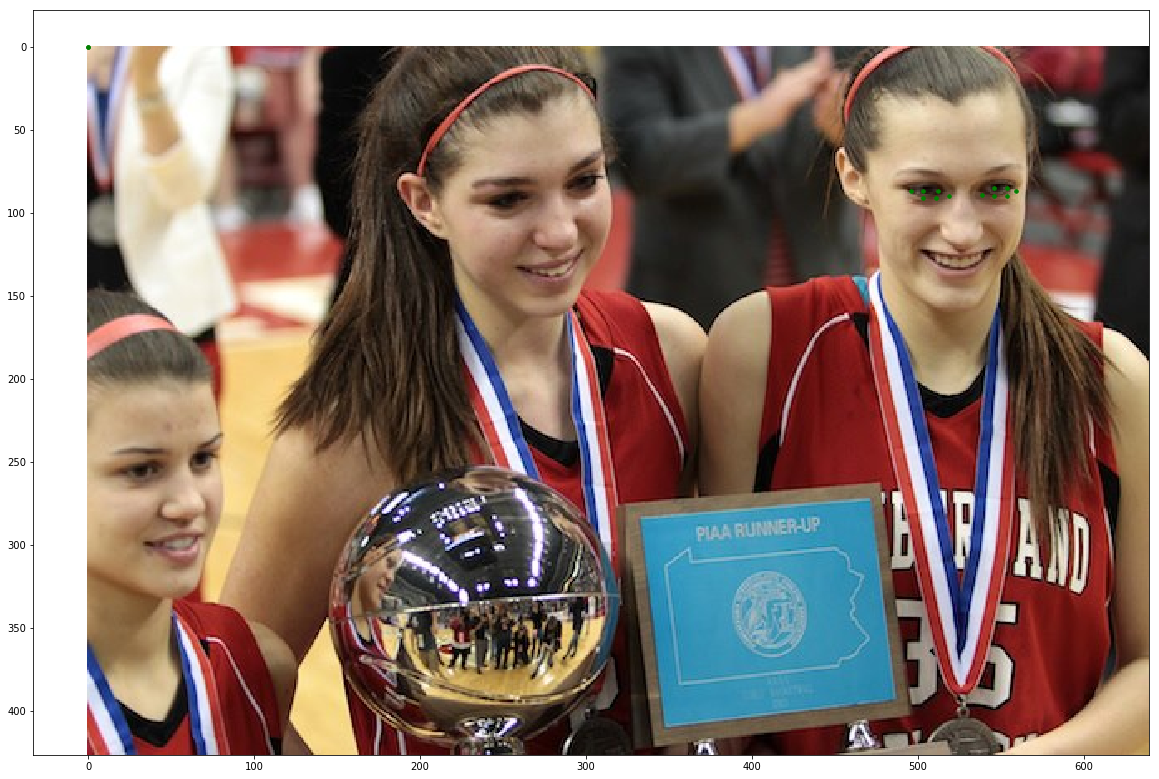

In [30]:
import matplotlib.pyplot as plt
import cv2
import glob
i = 200
img_list = glob.glob(save_root+'/*/*.png')
img = cv2.imread(img_list[i])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
anc = np.genfromtxt(img_list[i][:-4]+'.txt',delimiter=',')
anc = anc[:,2:]

fig = plt.figure(figsize=(20,20))
plt.imshow(img)
for a in anc:
    plt.scatter(a[0],a[1], s=50, marker='.', c='g')
plt.show()

# Fix LFPW

In [5]:
root = 'D:/share/new_dataset/gaze_dataset_on_web/LFPW'
save_root = 'D:/share/new_dataset/gaze_dataset_on_web/LFPW_FIX'
if not os.path.exists(save_root):
    os.makedirs(save_root)
                
for fn_list in os.walk(root):
    for fn in fn_list[2]:
        if fn.endswith('.pts'):
            txt = os.path.join(fn_list[0],fn)
            path = txt[len(root)+1:]
            img_path = path[:-4]+'.png'
            save_path = os.path.join(save_root,path)[:-4]+'.txt'
            save_img_path = os.path.join(save_root,img_path)
            if not os.path.exists(os.path.dirname(save_path)):
                os.makedirs(os.path.dirname(save_path))
            if not os.path.exists(os.path.dirname(save_img_path)):
                os.makedirs(os.path.dirname(save_img_path))
            with open(txt,'r') as lines:
                lines = lines.read().split('\n')[39:51]
                label = [line.split(' ')[:2] for line in lines]
                label = np.around(np.array(label).astype(np.float)).astype(np.int)
                anc = label.copy()
                anc[6,:],anc[9,:] = label[9,:],label[6,:]           
                anc[7,:],anc[8,:] = label[8,:],label[7,:]
                anc[10,:],anc[11,:] = label[11,:],label[10,:]
                
                with open(save_path,'w+') as f:
                    for n,a in enumerate(anc):              
                        f.write(str(n//6)+','+str(n%6)+','+str(a[0])+','+str(a[1])+'\n')
                        if n == 5:
                            f.write('0,6,0,0\n')
                        if n == 11:
                            f.write('1,6,0,0\n')
            shutil.copy(txt[:-4]+'.png',save_img_path)

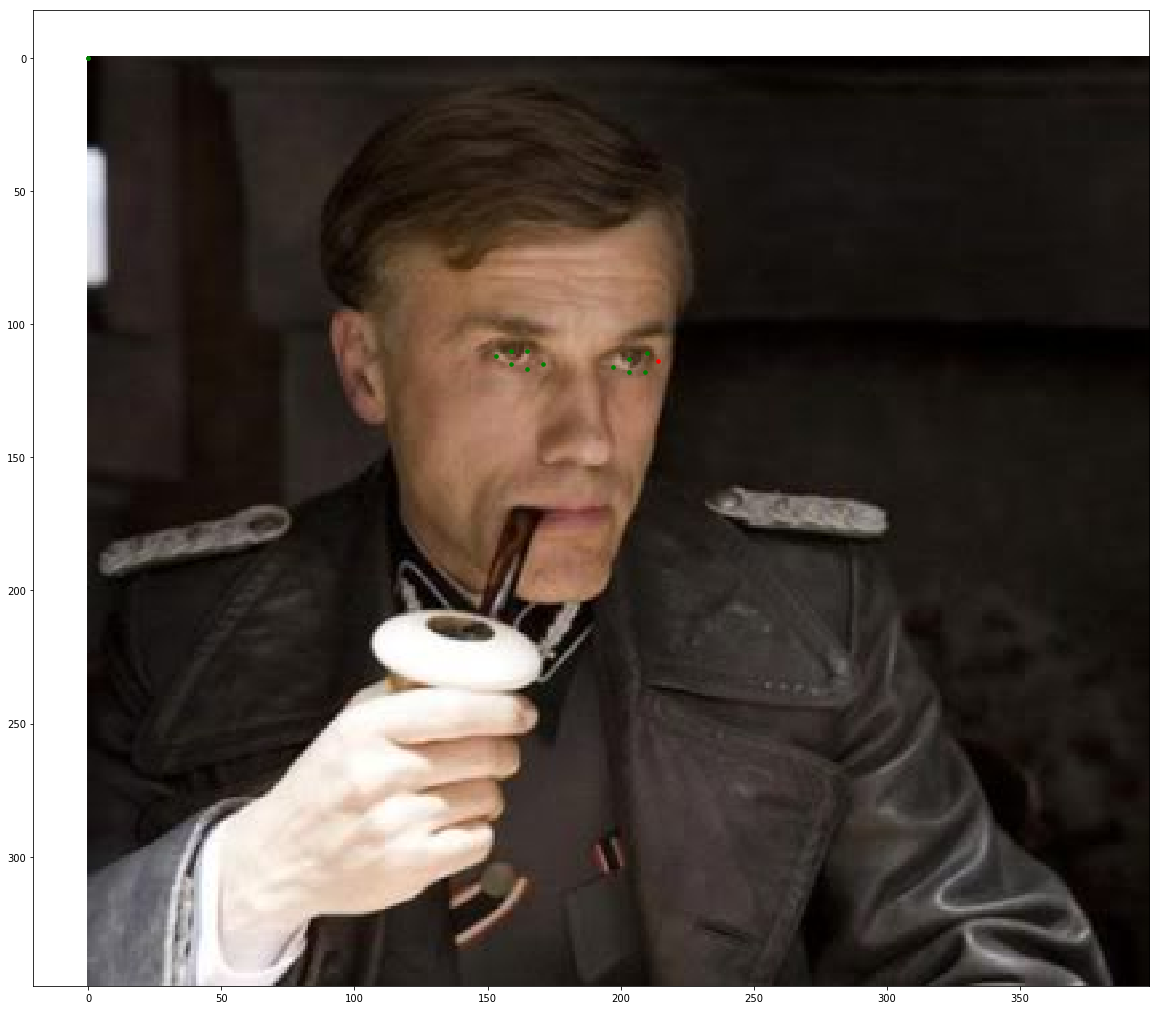

In [7]:
import matplotlib.pyplot as plt
import cv2
import glob
i = 200
img_list = glob.glob(save_root+'/*/*.png')
img = cv2.imread(img_list[i])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
anc = np.genfromtxt(img_list[i][:-4]+'.txt',delimiter=',')
anc = anc[:,2:]

fig = plt.figure(figsize=(20,20))
plt.imshow(img)
for n,a in enumerate(anc):
    if n == 7:
        plt.scatter(a[0],a[1], s=50, marker='.', c='r')
    else:
        plt.scatter(a[0],a[1], s=50, marker='.', c='g')
plt.show()